In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("Online Retail.csv",on_bad_lines='skip')
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [22]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


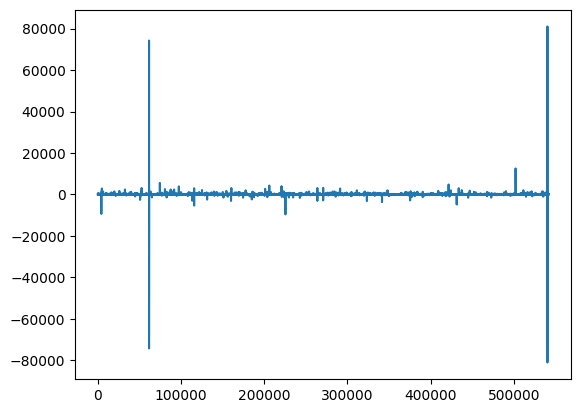

In [23]:
Range =  np.arange(0,len(df))
_ = plt.figure()
plt.plot(Range, df["Quantity"])
plt.show()

In [25]:
df2 = df[:1000] #Cleaning Negatives from list
for i in df2["Quantity"]:
  if(i<=0):
   i=df2[df2["Quantity"]==i].index
   df2=df2.drop(i)

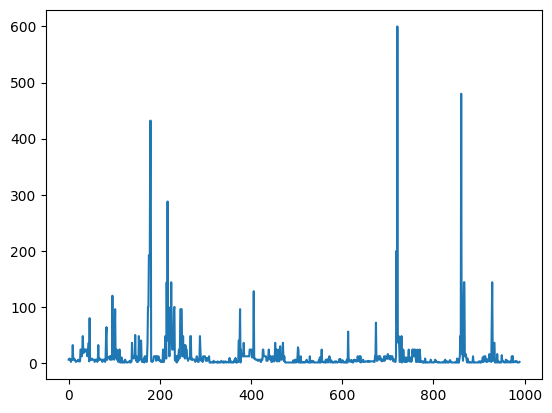

In [26]:
Range =  np.arange(0,len(df2))
_ = plt.figure()
plt.plot(Range, df2["Quantity"])
plt.show()

In [31]:
#dt = pd.to_datetime(df2["InvoiceDate"]) All entries had same timestamp so graph was meaningless
#df2["timestamp"] = dt.astype('int64')

x = df2[(df2["Country"] == "France")]["UnitPrice"] 
y = df2[(df2["Country"] == "France")]["Quantity"]


In [1]:
_ = plt.figure(figsize=(20, 10)) 
plt.scatter(x, y)
plt.scatter(x, y, s=100)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
import yfinance as yf

START_DATE = "2019-01-08"
END_DATE = "2023-12-12"
TICKER = "TSLA"

price = yf.download(TICKER, start=START_DATE, end=END_DATE, interval="1mo")
price.head()

In [ ]:
price["Date"] = price.index
close = price[["Date", "Close"]]
close.dropna(inplace=True)

_ = plt.figure(figsize=(15, 6))
plt.plot(close["Date"], close["Close"])
plt.show()

close.set_index(close["Date"], inplace=True)
close.asfreq("M")
close.drop("Date", axis=1, inplace=True)

close.head()

In [ ]:
decomposition = sm.tsa.seasonal_decompose(close)
fig = decomposition.plot()
plt.show()